## 1. Transcriptome&translation&ORF calling

/tmp/ipykernel_3989518/1532258188.py:62: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


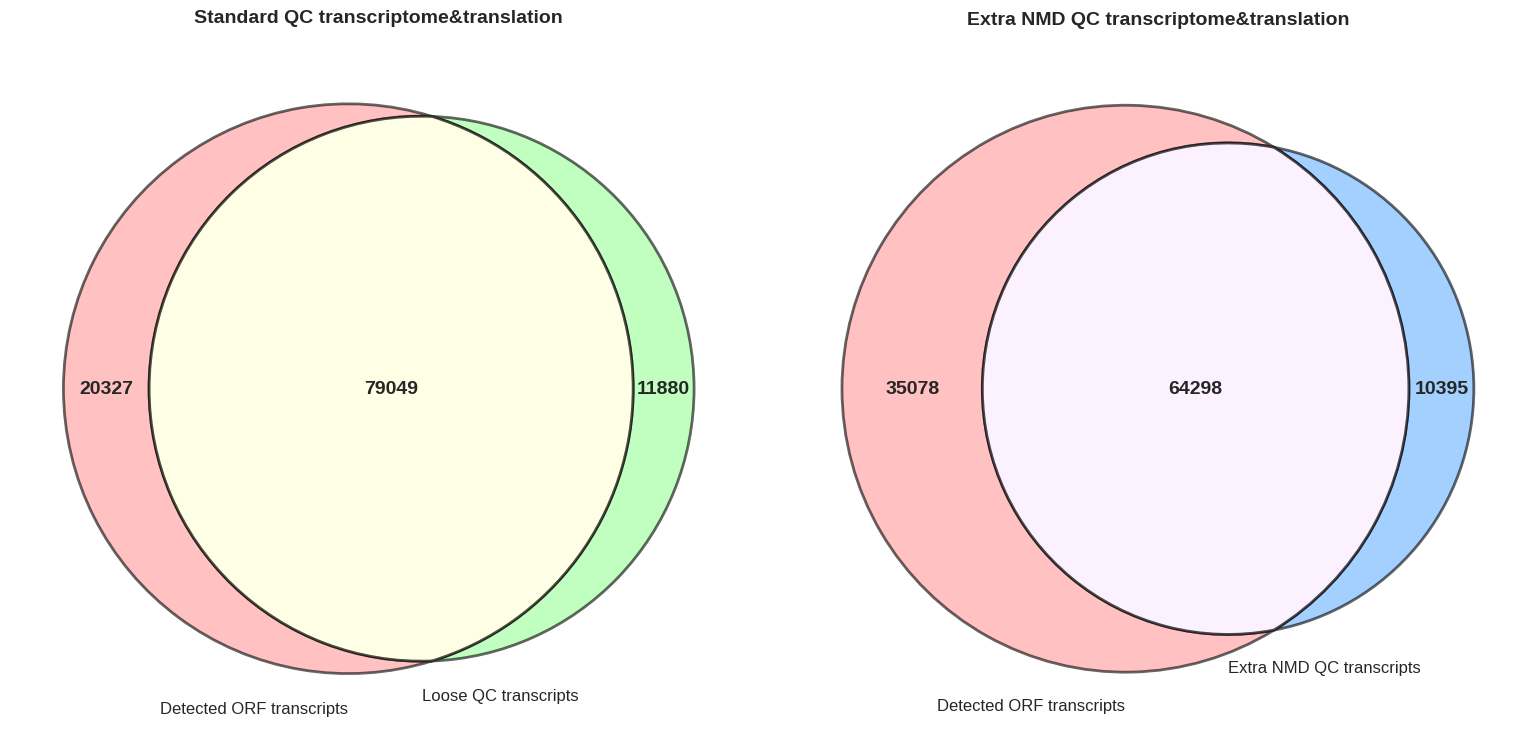

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.colors as mcolors

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from file and return as set"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

def create_custom_venn(set1, set2, labels, ax, colors=None):
    """Create a customized Venn diagram"""
    if colors is None:
        colors = ['#FF9999', '#66B2FF']  # Soft red and soft blue
    
    # Calculate set differences and intersection
    only_1 = set1 - set2
    only_2 = set2 - set1
    intersection = set1 & set2
    
    # Create Venn diagram with custom colors and properties
    venn = venn2(subsets=(len(only_1), len(only_2), len(intersection)),
                 set_labels=labels,
                 ax=ax,
                 set_colors=(colors[0], colors[1]),
                 alpha=0.6)  # Set transparency
    
    # Customize the appearance
    for patch in venn.patches:
        patch.set_edgecolor('black')  # Add black borders
        patch.set_linewidth(2.0)      # Make borders thicker
    
    # Customize text appearance
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(12)
            # text.set_fontweight('bold')
    
    # Make the numbers (subset labels) larger
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)  # Increased from 10 to 14
            text.set_fontweight('bold')  # Added bold to numbers

def main():
    # File paths
    file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
    file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
    file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"
    
    # Read data
    file1_ids = read_file_ids(file1_path, "transcript_id")
    file2_ids_1 = read_file_ids(file2_path_1)
    file2_ids_2 = read_file_ids(file2_path_2)
    
    # Create figure with custom style
    plt.style.use('seaborn')
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    fig.patch.set_facecolor('white')
    
    # Custom colors for each diagram
    colors_1 = ['#FF9999', '#99FF99']  # Soft red and soft green
    colors_2 = ['#FF9999', '#66B2FF']  # Soft red and soft blue
    
    # Create both Venn diagrams
    create_custom_venn(file1_ids, file2_ids_1, 
                      ('Detected ORF transcripts', 'Loose QC transcripts'), 
                      axes[0], colors_1)
    create_custom_venn(file1_ids, file2_ids_2, 
                      ('Detected ORF transcripts', 'Extra NMD QC transcripts'), 
                      axes[1], colors_2)
    
    # Customize titles
    axes[0].set_title('Standard QC transcriptome&translation', 
                     pad=20, fontsize=14, fontweight='bold')
    axes[1].set_title('Extra NMD QC transcriptome&translation', 
                     pad=20, fontsize=14, fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout(pad=3.0)
    plt.show()

if __name__ == "__main__":
    main()

In [15]:
import re

def read_fasta_ids(file_path):
    """Read FASTA file and return set of IDs"""
    ids = set()
    with open(file_path) as file:
        for line in file:
            if line.startswith(">"):
                # 使用正则表达式提取">"后面的ID部分
                match = re.match(r">([^\t]+)", line)
                if match:
                    ids.add(match.group(1))  # 添加ID到集合中
    return ids

# 使用该函数提取FASTA ID
fasta_file_path = "04_delete_dup/007.no_proteome_great100_one_longests_noDup_cleanID.fasta"
fasta_ids = read_fasta_ids(fasta_file_path)

# 打印提取的FASTA IDs
print(f"File3 (FASTA) IDs: {fasta_ids}")


File3 (FASTA) IDs: {'ENST00000551840.5', 'TALONT000325392', 'TALONT000390043', 'ENST00000441778.6', 'TALONT000321665', 'TALONT000353906', 'TALONT000398830', 'TALONT000397024', 'TALONT000263574', 'ENST00000265742.8', 'TALONT000313733', 'TALONT000270941', 'TALONT000297287', 'TALONT000314651', 'TALONT000338016', 'TALONT000400397', 'ENST00000299164.4', 'TALONT000342706', 'TALONT000400421', 'TALONT000272981', 'TALONT000333225', 'TALONT000375418', 'TALONT000298767', 'TALONT000325557', 'TALONT000295901', 'TALONT000282088', 'TALONT000401429', 'TALONT000359243', 'TALONT000359389', 'TALONT000352271', 'TALONT000286558', 'ENST00000527614.6', 'TALONT000304072', 'TALONT000301285', 'ENST00000420843.7', 'TALONT000331229', 'ENST00000671018.1', 'TALONT000394037', 'ENST00000679568.1', 'TALONT000376896', 'TALONT000282424', 'TALONT000402617', 'TALONT000380241', 'TALONT000377231', 'TALONT000336272', 'TALONT000328971', 'TALONT000364938', 'TALONT000315143', 'TALONT000375032', 'TALONT000326204', 'TALONT0003164

In [16]:
fasta_ids

{'ENST00000551840.5',
 'TALONT000325392',
 'TALONT000390043',
 'ENST00000441778.6',
 'TALONT000321665',
 'TALONT000353906',
 'TALONT000398830',
 'TALONT000397024',
 'TALONT000263574',
 'ENST00000265742.8',
 'TALONT000313733',
 'TALONT000270941',
 'TALONT000297287',
 'TALONT000314651',
 'TALONT000338016',
 'TALONT000400397',
 'ENST00000299164.4',
 'TALONT000342706',
 'TALONT000400421',
 'TALONT000272981',
 'TALONT000333225',
 'TALONT000375418',
 'TALONT000298767',
 'TALONT000325557',
 'TALONT000295901',
 'TALONT000282088',
 'TALONT000401429',
 'TALONT000359243',
 'TALONT000359389',
 'TALONT000352271',
 'TALONT000286558',
 'ENST00000527614.6',
 'TALONT000304072',
 'TALONT000301285',
 'ENST00000420843.7',
 'TALONT000331229',
 'ENST00000671018.1',
 'TALONT000394037',
 'ENST00000679568.1',
 'TALONT000376896',
 'TALONT000282424',
 'TALONT000402617',
 'TALONT000380241',
 'TALONT000377231',
 'TALONT000336272',
 'TALONT000328971',
 'TALONT000364938',
 'TALONT000315143',
 'TALONT000375032',
 'TA

In [ ]:
import pandas as pd

def read_file_ids(file_path, id_column='isoform_id', separator='\t'):
    """Read IDs from file and return as set"""
    df = pd.read_csv(file_path, sep=separator, low_memory=False)
    if id_column == "transcript_id":
        ids = set()
        for id_str in df[id_column].dropna():
            ids.update(id_str.split(","))
        return ids
    return set(df[id_column].dropna())

# 读取文件的ID
file1_path = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/02_translatome_riboseq/03_cal_merge_A132_A133/001.A132_loose_detect_ORF_id.tsv"
file2_path_1 = "/cpu2/jiang_tao/13.3Disoform/03_filter_parameter/01_filter_proteome/mmseqs2_longestORF_proteome/02_reference_proteome/orfanage/filtering_transcriptome/021.filtered_no_AFDB_sqanti3_classifcation_90928.tsv"
file2_path_2 = "/cpu2/jiang_tao/13.3Disoform/14_3DisoGalaxy_20241217/01_transcriptome_QC/filtering_transcriptome/021.filtered_0916_gff3_classification_merged_detection_rate.tsv"

# 提取ID
file1_ids = read_file_ids(file1_path, "transcript_id")
file2_ids_1 = read_file_ids(file2_path_1)
file2_ids_2 = read_file_ids(file2_path_2)

# 计算交集
intersection_file1_fasta = file1_ids & fasta_ids
intersection_file2_1_fasta = file2_ids_1 & fasta_ids
intersection_file2_2_fasta = file2_ids_2 & fasta_ids

# 打印交集
print(f"Intersection between file1 and fasta: {intersection_file1_fasta}")
print(f"Intersection between file2_1 and fasta: {intersection_file2_1_fasta}")
print(f"Intersection between file2_2 and fasta: {intersection_file2_2_fasta}")


In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def create_custom_venn(set1, set2, set3, labels, ax, colors=None):
    """Create a customized Venn diagram for 3 sets"""
    if colors is None:
        colors = ['#FF9999', '#66B2FF', '#99FF99']  # Soft red, soft blue, soft green
    
    # Calculate set differences and intersection
    only_1 = set1 - set2 - set3
    only_2 = set2 - set1 - set3
    only_3 = set3 - set1 - set2
    intersection_12 = set1 & set2 - set3
    intersection_13 = set1 & set3 - set2
    intersection_23 = set2 & set3 - set1
    intersection_123 = set1 & set2 & set3
    
    # Create Venn diagram for 3 sets with custom colors and properties
    venn = venn3(subsets=(len(only_1), len(only_2), len(intersection_12), 
                          len(only_3), len(intersection_13), len(intersection_23), 
                          len(intersection_123)),
                 set_labels=labels,
                 ax=ax,
                 set_colors=(colors[0], colors[1], colors[2]),
                 alpha=0.6)  # Set transparency
    
    # Customize the appearance
    for patch in venn.patches:
        if patch is not None:  # Check if the patch is valid
            patch.set_edgecolor('black')  # Add black borders
            patch.set_linewidth(2.0)      # Make borders thicker
    
    # Customize text appearance
    for text in venn.set_labels:
        if text is not None:
            text.set_fontsize(12)
    
    # Make the numbers (subset labels) larger
    for text in venn.subset_labels:
        if text is not None:
            text.set_fontsize(14)  # Increased from 10 to 14
            text.set_fontweight('bold')  # Added bold to numbers

def main():
    # Create figure with custom style
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(24, 8))  # Adjusted for 2 plots
    fig.patch.set_facecolor('white')
    
    # Custom colors for each diagram
    colors_1 = ['#FF9999', '#99FF99', '#66B2FF']  # Soft red, soft green, soft blue
    
    # Create Venn diagrams
    create_custom_venn(file1_ids, file2_ids_1, fasta_ids, 
                      ('Detected ORF transcripts', 'Loose QC transcripts', 'Proteome transcripts'), 
                      axes[0], colors_1)
    create_custom_venn(file1_ids, file2_ids_2, fasta_ids, 
                      ('Detected ORF transcripts', 'Extra NMD QC transcripts', 'Proteome transcripts'), 
                      axes[1], colors_1)
    
    # Customize titles
    axes[0].set_title('ORF transcriptome vs Proteome comparison (Loose QC)', pad=20, fontsize=14, fontweight='bold')
    axes[1].set_title('ORF transcriptome vs Proteome comparison (Extra NMD QC)', pad=20, fontsize=14, fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout(pad=3.0)
    plt.show()

if __name__ == "__main__":
    main()
